# Datamapplot Visualization in Python

## Overview
This document describes a Python script for visualizing data using the `datamapplot` library. The script involves data extraction, processing, label replacement, and creation of a datamap plot.

## Dependencies
- `matplotlib`: For setting plot configurations.
- `datamapplot`: For creating datamap plots.
- `numpy` and `pandas`: For data manipulation.

## Process Description
1. **Matplotlib Configuration**: Set the DPI (dots per inch) for matplotlib figures.
2. **Data Extraction and Processing**:
   - `extract_and_process_data`: Extracts 'Label' and 'Topic Domain' from a specified column in a DataFrame and processes the data by removing quotation marks from the 'Label' column.
   - Utilizes regex patterns to extract and add columns to the dataset.
3. **Label Replacement**:
   - `replace_labels`: Replaces old labels with new labels based on a mapping DataFrame.
   - Converts the mapping DataFrame to a dictionary for label replacement.
4. **Datamap Plot Creation and Saving**:
   - `create_and_save_datamap_plot`: Creates a datamap plot with specified labels and saves it as an image file.
   - Customizes the plot with parameters like point size, figure size, marker type, and label styling.
   - Specific labels can be highlighted with different font settings.

## Conclusion
This script demonstrates how to enhance data visualization in Python using `datamapplot`, providing capabilities for sophisticated label management and plot customization.


In [9]:
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300

import datamapplot
import numpy as np
import pandas as pd

import pandas as pd
import re

def extract_and_process_data(dataset, column_name):
    """
    Extracts 'Label' and 'Topic Domain' from a specified column in the DataFrame 
    and processes the data by removing quotation marks from the 'Label' column.

    Parameters:
    dataset (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column from which to extract data.

    Returns:
    pandas.DataFrame: The DataFrame with added and processed 'Label' and 'Topic Domain' columns.
    """
    # Define the regex pattern to extract Label and Topic Domain
    pattern = r"Label: (?P<Label>.+)\nTopic Domain: (?P<Topic_Domain>.+)"

    # Apply the regex to the specified column
    extracted_data = dataset[column_name].str.extract(pattern)

    # Add the 'Label' and 'Topic Domain' columns to the existing 'dataset' DataFrame
    dataset['Label'] = extracted_data['Label']
    dataset['Topic_Domain'] = extracted_data['Topic_Domain']

    # Remove quotation marks from the 'Label' column
    dataset['Label'] = dataset['Label'].str.replace('"', '')

    return dataset

def replace_labels(old_labels_array, mapping_dataframe):
    """
    Replace old labels with new labels based on a mapping DataFrame.
    """
    mapping_dataframe['Name'] = mapping_dataframe['Name'].astype(str)
    label_mapping = dict(zip(mapping_dataframe['Name'], mapping_dataframe['Label']))
    print("Label Mapping Dictionary to check:", label_mapping)
    old_labels_array = old_labels_array.astype(str)
    new_labels_array = np.array([label_mapping.get(label, label) for label in old_labels_array])
    return new_labels_array

def create_and_save_datamap_plot(data_map, labels, file_name):
    """
    Create a data map plot with the specified labels and save it to a file.
    """
    fig, ax = datamapplot.create_plot(
        data_map,
        labels,
        point_size=2,
        figsize=(16, 12),
        marker_type="s",
        highlight_labels=[
            "Biden's Keystone Pipeline Decision and Impact on Gas Prices",
        ],
        label_font_size=11,
        highlight_label_keywords={
            "fontsize": 14, "fontweight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.55}
        },
    )
    fig.savefig(file_name, bbox_inches="tight")

Label Mapping Dictionary to check: {'-1_joe_the_biden_to': 'OUTLIERS', '0_shows_photograph_image_on': 'Misleading Depictions of President Joe Biden', '1_gas_prices_pipeline_oil': "Biden's Keystone Pipeline Decision and Impact on Gas Prices", '2_donald_2020_joe_presidential': "Joe Biden's Statements about Donald Trump During 2020 Presidential Campaign", '3_votes_ballots_election_in': '2020 Election Voting Discrepancies ', '4_hunter_son_laptop_pelosi': 'Fact-checking Hunter Biden Claims on Social Media', '5_covid19_vaccine_vaccines_vaccinated': "Fact-check on Joe Biden's Statements about COVID-19 and Vaccinations", '6_video_shows_speech_joe': "Joe Biden's Speeches and Actions in Shared Videos", '7_harris_kamala_vice_president': "Misinformation Regarding Kamala Harris's Presidential Position", '8_border_administration_illegal_the': "Biden Administration's Border Policy and COVID-19", '9_tax_taxes_your_raise': "Biden's Proposed Tax Changes ", '10_economy_rights_the_said': "Joe Biden's Stan

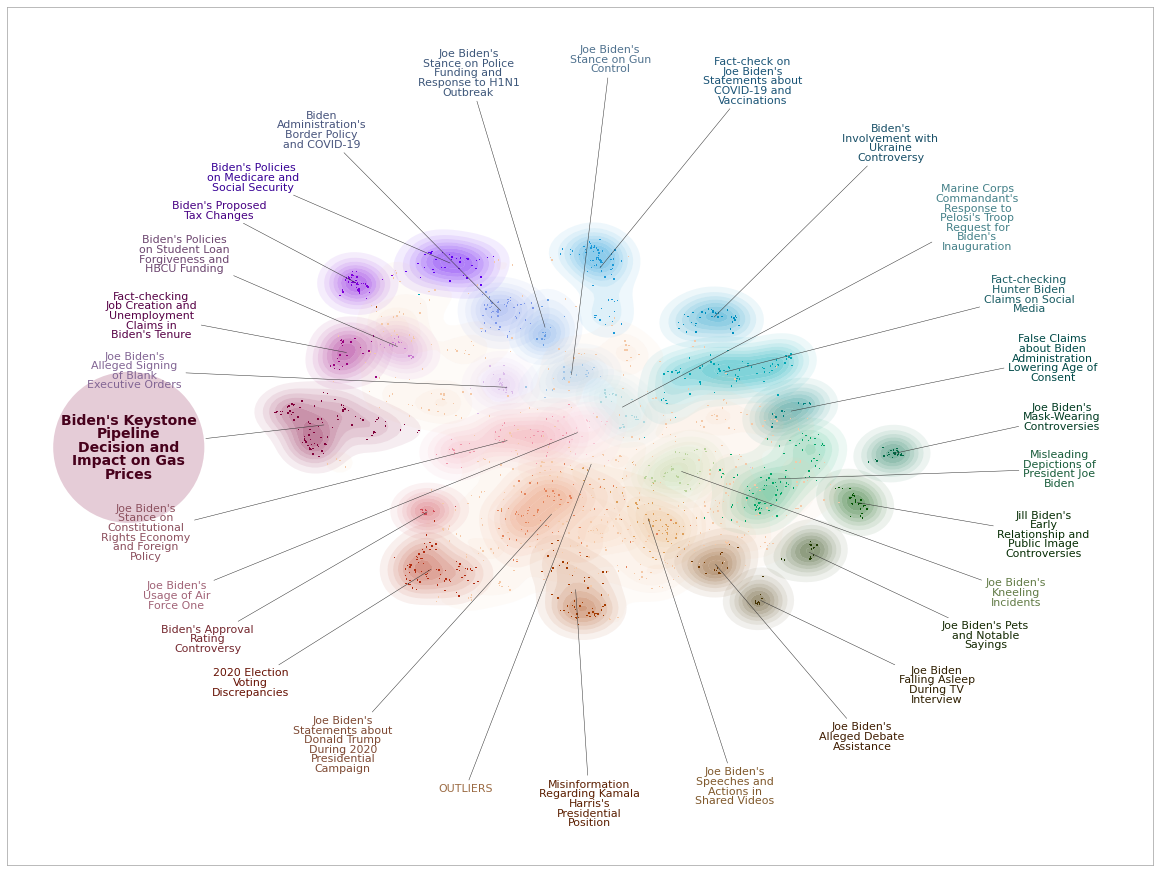

In [10]:
def main():
    # Example usage
    # Read dataset which Topic Labels
    dataset = pd.read_csv('biden_topic_labelled.csv')    
    dataset = extract_and_process_data(dataset, 'Human_Readable_Topic')
    
    #All the data with the rows      
    arxivml_labels = np.load('biden_context_data.npy', allow_pickle = True)
    new_labels = replace_labels(arxivml_labels, dataset)
    
    arxivml_data_map = np.load('biden.npy')
    arxivml_labels = np.load('biden_context_data.npy', allow_pickle = True)

    arxivml_data_map
    create_and_save_datamap_plot(arxivml_data_map, new_labels, "datamapplot-biden-context-auto.png")

if __name__ == "__main__":
    main()